In [42]:
import pandas as pd
import analysis_utils as au
import matplotlib.pyplot as plt

In [107]:
df_sim = pd.read_csv('outputs/sweep_test/3.80/watcher_points.csv')
df_exp = pd.read_csv('experimental_data/heat_data.csv')

In [108]:
df_sim.head()

,time,pside,oside
0,7.000000e-08,300.0,300.0
1,1.400000e-07,300.0,300.0
2,2.100000e-07,300.0,300.0
3,2.800000e-07,300.0,300.0
4,3.500000e-07,300.0,300.0


In [109]:
df_exp.head()

,time,temp,oside
0,3.566180e-07,2155.554616,2455.604902
1,4.992650e-07,2153.367894,2453.517236
2,6.419120e-07,2153.109739,2452.114492
3,7.845590e-07,2158.202562,2450.368546
4,9.272060e-07,2159.247517,2449.367002


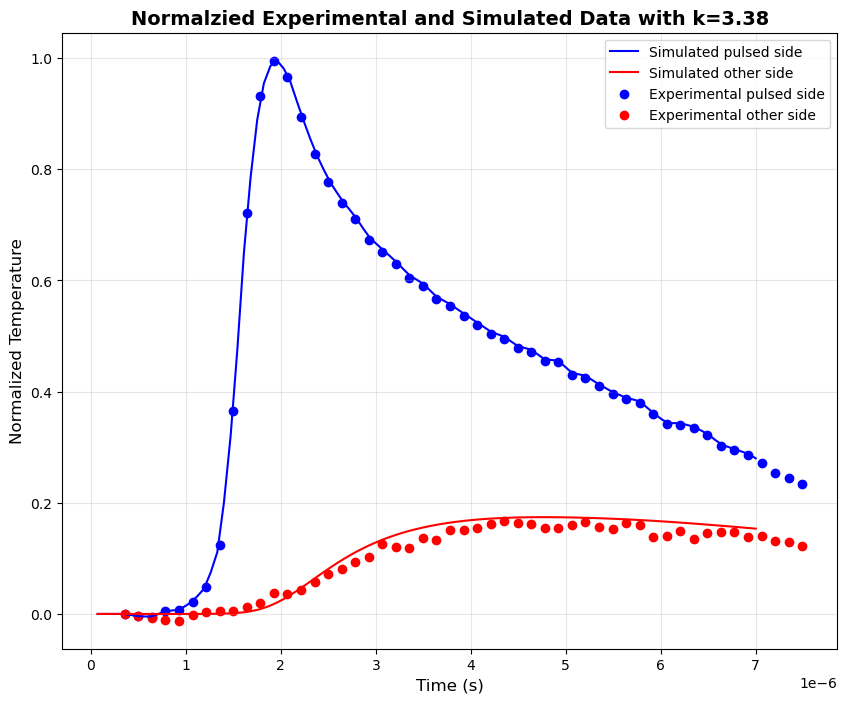

In [110]:
# Normalize simulation data
sim_pside_normed = (df_sim['pside'] - df_sim['pside'].iloc[0]) / (df_sim['pside'].max() - df_sim['pside'].min())
sim_oside_normed = (df_sim['oside'] - df_sim['oside'].iloc[0]) / (df_sim['pside'].max() - df_sim['pside'].min())

# Normalize experimental data
exp_pside_normed = (df_exp['temp'] - df_exp['temp'].iloc[0]) / (df_exp['temp'].max() - df_exp['temp'].min())

# Downshift experimental oside to start from ic_temp and normalize
ic_temp = 300
oside_initial = df_exp['oside'].iloc[0]
exp_oside_shifted = df_exp['oside'] - oside_initial + ic_temp
exp_oside_normed = (exp_oside_shifted - exp_oside_shifted.iloc[0]) / (df_exp['temp'].max() - df_exp['temp'].min())

# Get times
sim_time = df_sim['time']
exp_time = df_exp['time']

fig, ax = plt.subplots(figsize = (10, 8))

# Plot sim data
ax.plot(sim_time, sim_pside_normed, color='blue', label='Simulated pulsed side')
ax.plot(sim_time, sim_oside_normed, color='red', label='Simulated other side')

# Plot experimental data
ax.scatter(exp_time, exp_pside_normed, color='blue', label='Experimental pulsed side')
ax.scatter(exp_time, exp_oside_normed, color='red', label='Experimental other side')

ax.grid(True, alpha = 0.3)
ax.legend()

ax.set_ylabel('Normalized Temperature', fontsize=12)
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_title('Normalzied Experimental and Simulated Data with k=3.38', fontsize=14, fontweight='bold')
plt.show()

In [77]:
df_rmse.loc[df_rmse['k'] == 3.38]['rmse']

4    0.00886
Name: rmse, dtype: float64

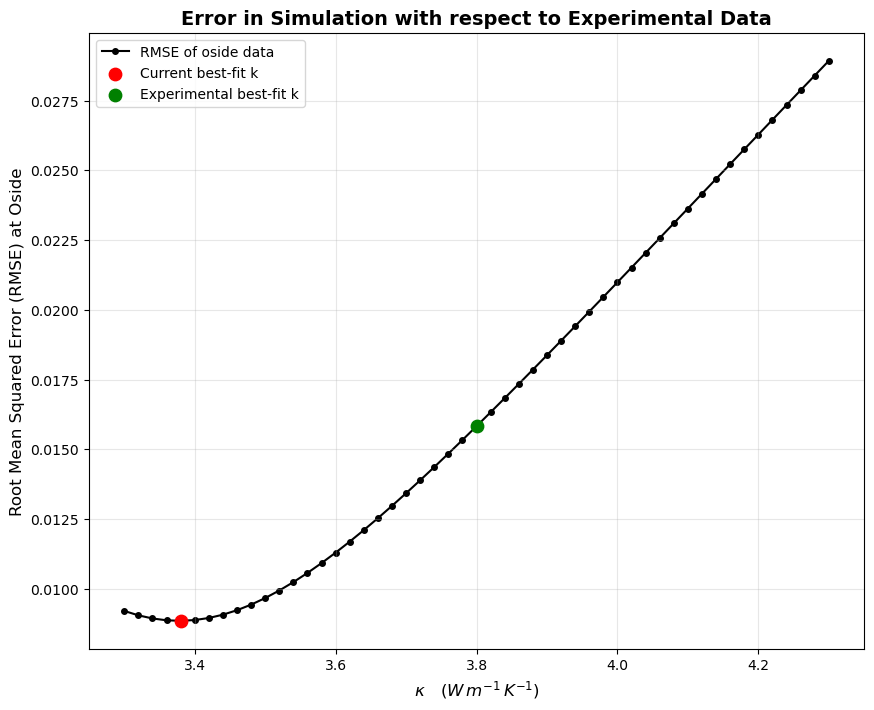

In [113]:
df_rmse = pd.read_csv('outputs/sweep_test/rmse_summary.csv')
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(df_rmse['k'], df_rmse['rmse'], color='black', marker='o', markersize=4, zorder = 1, label='RMSE of oside data')
ax.scatter(df_rmse.loc[df_rmse['k'] == 3.38]['k'], df_rmse.loc[df_rmse['k'] == 3.38]['rmse'], color='red', zorder=2, s=80, label='Current best-fit k')
ax.scatter(df_rmse.loc[df_rmse['k'] == 3.8]['k'], df_rmse.loc[df_rmse['k'] == 3.8]['rmse'], color='green', zorder=2, s=80, label='Experimental best-fit k')

ax.grid(True, alpha = 0.3)
ax.legend()
ax.set_ylabel('Root Mean Squared Error (RMSE) at Oside', fontsize=12)
ax.set_xlabel(r'$\kappa\quad(W\,m^{-1}\,K^{-1}$)', fontsize = 12)
ax.set_title('Error in Simulation with respect to Experimental Data', fontsize = 14, fontweight = 'bold')
plt.show()